# loan data from Lendingclub.com 
: check profile then predict that did they will full paying back ?
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# data visualization 
สำรวจข้อมูลคร่าวๆ

ช่วงคะแนน fico ที่ผ่าน credit policy

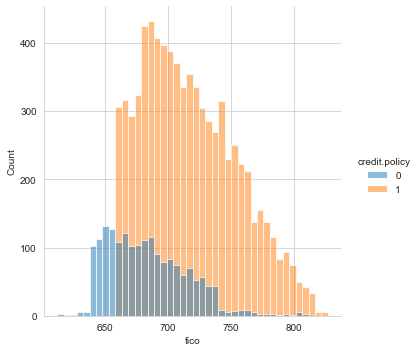

In [23]:
sns.set_style('whitegrid')
sns.displot(x='fico',data=loans,hue='credit.policy')

แบ่งตาม purpose ของการกู้แล้วดูว่ากู้ไปทำอะไรแล้ว not fully paid เท่าไหร่ในแต่ละ purpose

<AxesSubplot:xlabel='purpose', ylabel='count'>

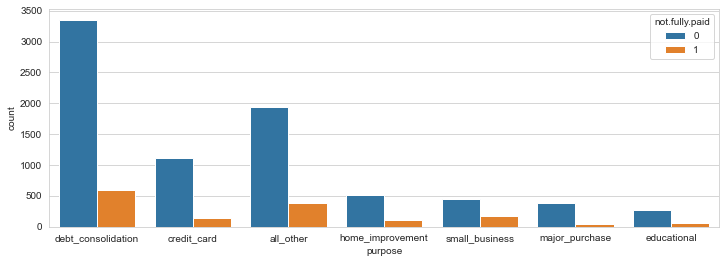

In [21]:
plt.figure(figsize=(12,4))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid')

Text(0, 0.5, 'Not fully paid rate')

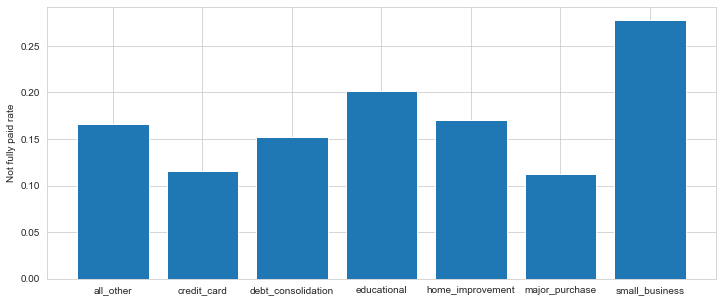

In [29]:
notfullypaid_rate = loans.groupby('purpose')['not.fully.paid'].sum()/loans.groupby('purpose')['not.fully.paid'].count()
plt.figure(figsize=(12,5))
plt.bar(notfullypaid_rate.index,notfullypaid_rate.values)
plt.ylabel('Not fully paid rate')

ดูแนวโน้ม interest rate จากผลของ fico score

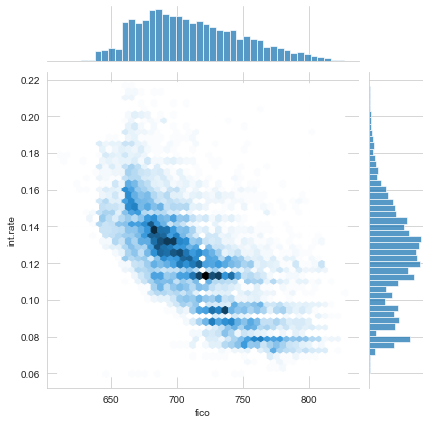

In [35]:
sns.jointplot(x='fico',y='int.rate',data=loans,kind='hex')

In [36]:
loans_new = pd.get_dummies(data=loans,columns=['purpose'],drop_first=True)
loans_new.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# build desicion tree model

In [37]:
from sklearn.model_selection import train_test_split
X = loans_new.drop('not.fully.paid',axis=1)
y = loans_new['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_tree = dtree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_tree))
print(classification_report(y_test,y_tree))

[[1658  315]
 [ 330   92]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1973
           1       0.23      0.22      0.22       422

    accuracy                           0.73      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.73      0.73      0.73      2395



accuracy 84%

# build random forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_rfc = rfc.predict(X_test)

In [43]:
print(confusion_matrix(y_test,y_rfc))
print(classification_report(y_test,y_rfc))

[[1960   13]
 [ 415    7]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1973
           1       0.35      0.02      0.03       422

    accuracy                           0.82      2395
   macro avg       0.59      0.50      0.47      2395
weighted avg       0.74      0.82      0.75      2395



accuracy 90%